### Implementing simple Chatbot Using LangGraph

In [1]:
from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END

## Reducers
from typing import Annotated
from langgraph.graph.message import add_messages

In [2]:
class State(TypedDict):
    messages:Annotated[list,add_messages]

In [3]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ["OPENAI_API_KEY"]=os.getenv("OPENAI_API_KEY")
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")


In [4]:
from langchain_openai import ChatOpenAI
llm = ChatOpenAI(model="gpt-4o")
llm.invoke("Hello")

AIMessage(content='Hi there! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 8, 'total_tokens': 18, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_76544d79cb', 'id': 'chatcmpl-BY5M6pHPwnUeIfvgChxBtjm8Oagqr', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--294ecc52-3d31-4ecc-b826-88c370a8b8e6-0', usage_metadata={'input_tokens': 8, 'output_tokens': 10, 'total_tokens': 18, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [5]:
from langchain_groq import ChatGroq

llm_groq=ChatGroq(model="qwen-qwq-32b")
llm_groq.invoke("Hey I am Mohan and i like to play cricket")

AIMessage(content="\n<think>\nOkay, the user introduced himself as Mohan and mentioned he likes playing cricket. I need to respond in a friendly way. Let me start by welcoming him and acknowledging his interest. Maybe ask how long he's been playing. That should keep the conversation going. I should keep it casual and show genuine interest. Also, since cricket is a big sport, perhaps mention some popular teams or players to connect with him. Let me check if there are any specific questions he has or if he wants recommendations. Hmm, maybe ask about his favorite team or if he plays any position. That could lead to a deeper conversation. I should make sure the tone is positive and encouraging. Alright, time to put it all together in a natural, conversational manner without being too formal.\n</think>\n\nHello Mohan! That's great to hear—cricket is such a fun sport. How long have you been playing, and do you have a favorite position or role on the field? If you're into it, do you follow an

### We Will start With Creating Nodes

In [6]:
def superbot(state:State):
    return {"messages":[llm_groq.invoke(state['messages'])]}

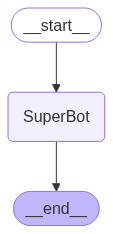

In [7]:
graph=StateGraph(State)

## node
graph.add_node("SuperBot",superbot)
## Edges

graph.add_edge(START,"SuperBot")
graph.add_edge("SuperBot",END)


graph_builder=graph.compile()


## Display
from IPython.display import Image, display
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [8]:
## Invocation

graph_builder.invoke({'messages':"Hi,My name is Mohan And I like cricket"})

{'messages': [HumanMessage(content='Hi,My name is Mohan And I like cricket', additional_kwargs={}, response_metadata={}, id='4c719a47-5313-4cf9-8a82-41207d58a769'),
  AIMessage(content="\n<think>\nOkay, the user introduced themselves as Mohan and mentioned they like cricket. I should respond warmly to make them feel welcome. Let me start by greeting them back and acknowledging their name and interest.\n\nMaybe ask a follow-up question about cricket to keep the conversation going. I can mention their favorite team or players, or if they play cricket themselves. That should help them engage more. Let me check if there's anything else I should consider. Keep it friendly and open-ended so they feel comfortable sharing more. Alright, let's put that together in a natural way.\n</think>\n\nHi Mohan! Nice to meet you. 😊 Cricket is a fantastic sport—do you follow any particular team or player? Or maybe you enjoy playing it yourself? Let me know—I’d love to chat about it!", additional_kwargs={},

#### Streaming The responses

In [9]:
for event in graph_builder.stream({"messages":"Hello My name is Mohan"}):
    print(event)

{'SuperBot': {'messages': [AIMessage(content='\n<think>\nOkay, the user said "Hello My name is Mohan." I need to respond appropriately. Let me start with a friendly greeting. Maybe say "Hello Mohan!" to acknowledge their name. Then, I should ask how I can assist them today. Keep it open-ended so they feel comfortable to ask anything. Let me check for any typos or errors. Hmm, looks good. Alright, that should be a good start.\n</think>\n\nHello Mohan! Nice to meet you. How can I assist you today? Feel free to ask anything! 😊', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 114, 'prompt_tokens': 16, 'total_tokens': 130, 'completion_time': 0.285981661, 'prompt_time': 0.003105106, 'queue_time': 0.246985094, 'total_time': 0.289086767}, 'model_name': 'qwen-qwq-32b', 'system_fingerprint': 'fp_1e88ca32eb', 'finish_reason': 'stop', 'logprobs': None}, id='run--668820bb-f890-4aa3-b0ae-22d9db6d5060-0', usage_metadata={'input_tokens': 16, 'output_tokens': 114, 'total_

In [10]:
for event in graph_builder.stream({"messages":"Hello My name is Mohan"},stream_mode="values"):
    print(event)

{'messages': [HumanMessage(content='Hello My name is Mohan', additional_kwargs={}, response_metadata={}, id='06d7893d-8781-4d3e-95e2-b84f0e135005')]}
{'messages': [HumanMessage(content='Hello My name is Mohan', additional_kwargs={}, response_metadata={}, id='06d7893d-8781-4d3e-95e2-b84f0e135005'), AIMessage(content='\n<think>\nOkay, the user said "Hello My name is Mohan." I need to respond appropriately. Let me start by greeting them back. Since they mentioned their name, I should acknowledge that. Maybe say something like "Hello Mohan!" to make it personal. Then I can offer assistance. Keep the tone friendly and open-ended so they feel comfortable asking for help. Let me check if there\'s anything else I should consider. No, that\'s about it. Just make sure the response is welcoming and helpful.\n</think>\n\nHello Mohan! Nice to meet you. How can I assist you today? Feel free to ask me any questions or let me know if you need help with anything specific. 😊', additional_kwargs={}, resp